# Computer Graphics

Assignment 1: Exploration of Graphics Libraries

by Romrawin Chumpu 639506093 (Jinpu)

# PyCairo

Source document: https://pycairo.readthedocs.io/en/latest/index.html


PyCairo is the python library for studying computer graphics 

In [ ]:
!apt install libcairo2-dev libgif-dev
!pip install pycairo

## Define display function

In [ ]:
# from https://github.com/pygobject/pycairo/blob/master/examples/pycairo_examples.ipynb
import cairo
from IPython.display import Image, display
from io import BytesIO

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
    ctx = cairo.Context(surface)
    draw_func(ctx, 200, 200)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=200))

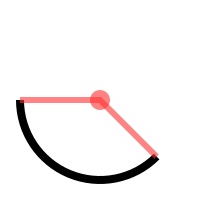

In [ ]:
from math import pi
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    xc = 0.5
    yc = 0.5
    radius = 0.4
    angle1 = 45.0 * (pi / 180.0)  # angles are specified
    angle2 = 180.0 * (pi / 180.0)  # in radians

    cr.arc(xc, yc, radius, angle1, angle2)
    cr.stroke()

    # draw helping lines
    cr.set_source_rgba(1, 0.2, 0.2, 0.6)
    cr.arc(xc, yc, 0.05, 0, 2 * pi)
    cr.fill()
    cr.set_line_width(0.03)
    cr.arc(xc, yc, radius, angle1, angle1)
    cr.line_to(xc, yc)
    cr.arc(xc, yc, radius, angle2, angle2)
    cr.line_to(xc, yc)
    cr.stroke()

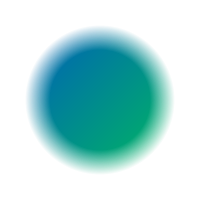

In [ ]:
@disp
def draw(cr, width, height):
  cr.scale(width, height)
  cr.set_line_width(0.04)

  pattern = cairo.LinearGradient(0, 0, 1, 1)
  pattern.add_color_stop_rgb(0, 0, 0.3, 0.8)
  pattern.add_color_stop_rgb(1, 0, 0.8, 0.3)

  mask = cairo.RadialGradient(0.5, 0.5, 0.25, 0.5, 0.5, 0.5)
  mask.add_color_stop_rgba(0, 0, 0, 0, 1)
  mask.add_color_stop_rgba(0.5, 0, 0, 0, 0)

  cr.set_source(pattern)
  cr.mask(mask)

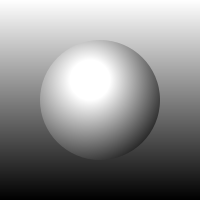

In [ ]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
    pat.add_color_stop_rgba(1, 0, 0, 0, 1)
    pat.add_color_stop_rgba(0, 1, 1, 1, 1)
    cr.rectangle(0, 0, 1, 1)
    cr.set_source(pat)
    cr.fill()

    pat = cairo.RadialGradient(0.45, 0.4, 0.1,
                               0.4, 0.4, 0.5)
    pat.add_color_stop_rgba(0, 1, 1, 1, 1)
    pat.add_color_stop_rgba(1, 0, 0, 0, 1)
    cr.set_source(pat)
    cr.arc(0.5, 0.5, 0.3, 0, 2 * pi)
    cr.fill()

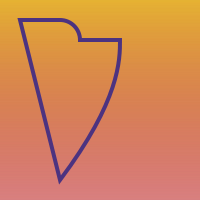

In [ ]:
@disp
def draw(ctx, width=256, height=256):
  ctx.scale(width, height)  # Normalizing the canvas

  pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
  pat.add_color_stop_rgba(1, 0.7, 0, 0, 0.5)  # First stop, 50% opacity
  pat.add_color_stop_rgba(0, 0.9, 0.7, 0.2, 1)  # Last stop, 100% opacity
  ctx.rectangle(0, 0, 1, 1)  # Rectangle(x0, y0, x1, y1)
  ctx.set_source(pat)
  ctx.fill()

  ctx.translate(0.1, 0.1)  # Changing the current transformation matrix

  ctx.move_to(0, 0)
  # Arc(cx, cy, radius, start_angle, stop_angle)
  ctx.arc(0.2, 0.1, 0.1, -math.pi / 2, 0)
  ctx.line_to(0.5, 0.1)  # Line to (x,y)
  # Curve(x1, y1, x2, y2, x3, y3)
  ctx.curve_to(0.5, 0.2, 0.5, 0.4, 0.2, 0.8)
  ctx.close_path()

  ctx.set_source_rgb(0.3, 0.2, 0.5)  # Solid color
  ctx.set_line_width(0.02)
  ctx.stroke()


# Numpy and Matplotlib for 3D illustration

- NumPy is a python library for large high-dimensional mathematical operations. 
- Matplotlib is a visualization library for python programming.

Source: https://www.geeksforgeeks.org/displaying-3d-images-in-python/

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Draw 3D scatter

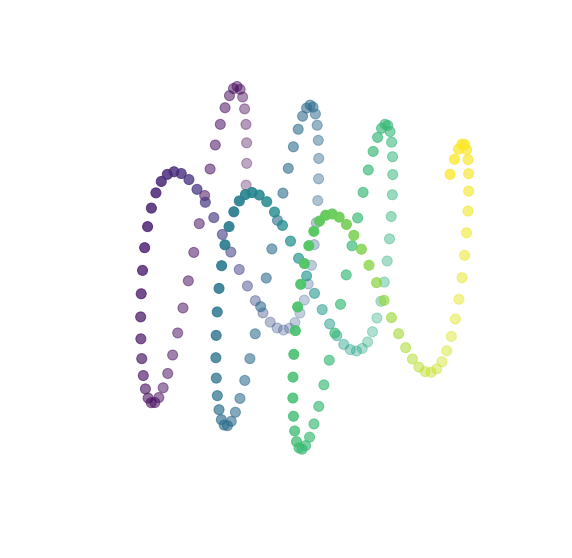

In [ ]:
# Define and set figure size 
fig = plt.figure(figsize=(10, 10))
 
# Define 3D axes to "ax"
ax = plt.axes(projection='3d')
 
# Create the point of values using numpy
x = np.arange(0, 20, 0.1)
y = np.cos(x)
z = y*np.sin(x)
c = x + y
 
# Plot the points from previous calculation as 3D scatter plot
ax.scatter(x, y, z, c=c, s=100)
 
# Turn off axes
plt.axis('off')
 
# Show the plot
plt.show()

## Draw voxels

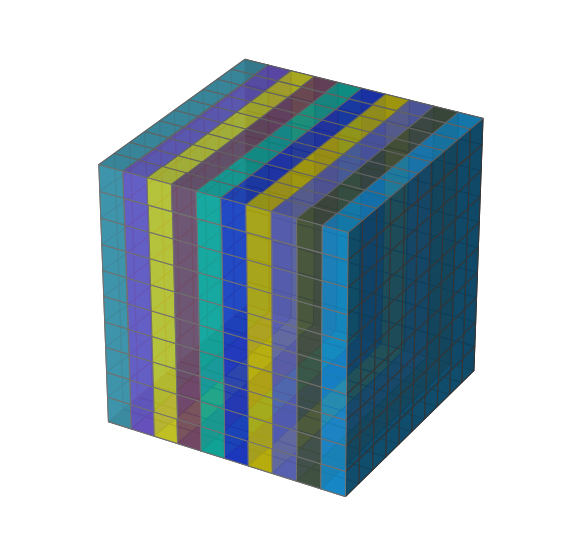

In [ ]:
# Define and set figure size 
fig = plt.figure(figsize=(10, 10))
 
# Generate a 3D sine wave
ax = plt.axes(projection='3d')
 
# Generate axes of 10x10x10
axes = [10, 10, 10]
 
# Create data
data = np.ones(axes)
 
# Control transparency
alpha = 0.8
 
# set colour
colors = np.empty(axes + [4])

# Set color in each row of voxels
for i in range(10):
  r, g, b = np.random.uniform(), np.random.uniform(), np.random.uniform()
  colors[i] = [r, g, b, alpha]
 
# turn off axes
plt.axis('off')
 
# Create voxels representation
ax.voxels(data, facecolors=colors, edgecolors='grey')
plt.show()

## Draw Möbius strip

Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

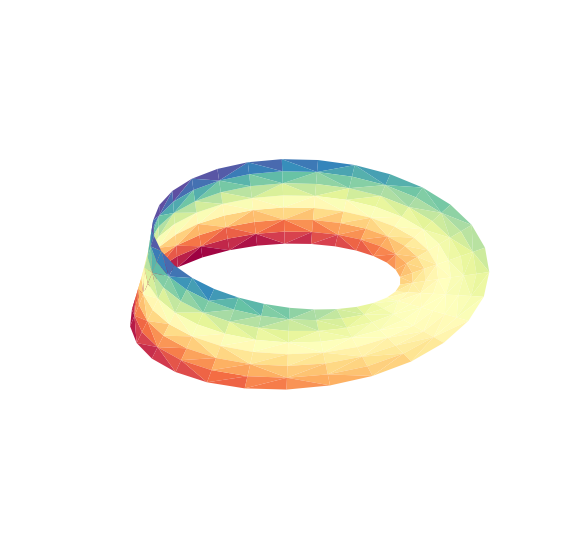

In [ ]:
# Define parameters
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.3, 0.3, 8)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta

# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='Spectral', linewidths=0.5);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
plt.axis("off")
plt.show()

# PyTorch3D

In [ ]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.9") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{torch.__version__[0:5:2]}"
        ])
        !pip install pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   118  100   118    0     0   1134      0 --:--:-- --:--:-- --:--:--  1134
100  404k    0  404k    0     0  1461k      0 --:--:-- --:--:-- --:--:-- 1461k
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-hbnrebqh
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-hbnrebqh
  Running command git checkout -q 9585a58d10cb2efcd159b058fa4af914203c1d0d
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 35.6 MB/s 
  Created wheel for pytorch3d: filename=pytorch3d-0.6.0-cp37-cp37m-linux_x86_64.whl size=25118083 sha256=ebe94ce831abab31877bd49bbc276375b7fc47dfdd39bb407afa55544aa62a34
  Stored in directory: /tmp/pip-ephem-wheel-cache-pxzxoaxz/wheels/4c/03/f0/326bb241eb86a155a12f217c81e16

## Import library

In [ ]:
import os
import torch
import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

# add path for demo utils functions 
import sys
import os
sys.path.append(os.path.abspath(''))

## Download 3D files

In [ ]:
!mkdir -p data/cow_mesh
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow_texture.png

--2021-11-20 16:06:37--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330659 (323K) [text/plain]
Saving to: ‘data/cow_mesh/cow.obj’

cow.obj             100%[===================>] 322.91K   758KB/s    in 0.4s    

2021-11-20 16:06:38 (758 KB/s) - ‘data/cow_mesh/cow.obj’ saved [330659/330659]

--2021-11-20 16:06:38--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155 [text/plain]
Saving to: ‘data/cow_mesh/cow.mtl’

cow.mtl             100%[========

In [ ]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths
DATA_DIR = "./data"
obj_filename = os.path.join(DATA_DIR, "cow_mesh/cow.obj")

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)

In [ ]:
# Initialize a camera.

R, T = look_at_view_transform(2.7, 0, 180) 
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

raster_settings = RasterizationSettings(
    image_size=512, 
    blur_radius=0.0, 
    faces_per_pixel=1, 
)

# Place a point light in front of the object. 
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

# Create a Phong renderer by composing a rasterizer and a shader. 
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device, 
        cameras=cameras,
        lights=lights
    )
)

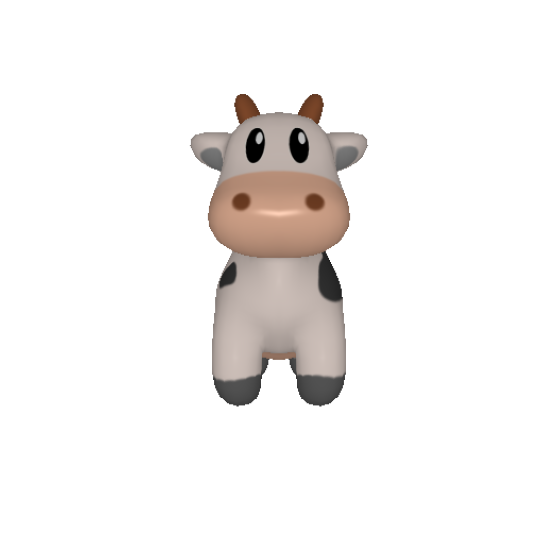

In [ ]:
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");

In [ ]:
# Set batch size - this is the number of different viewpoints from which we want to render the mesh.
batch_size = 20

# Create a batch of meshes by repeating the cow mesh and associated textures. 
meshes = mesh.extend(batch_size)

# Get a batch of viewing angles. 
elev = torch.linspace(0, 180, batch_size)
azim = torch.linspace(-180, 180, batch_size)

# All the cameras helper methods support mixed type inputs and broadcasting. 

R, T = look_at_view_transform(dist=2.7, elev=elev, azim=azim)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Move the light back in front of the cow which is facing the -z direction.
lights.location = torch.tensor([[0.0, 0.0, -3.0]], device=device)

In [ ]:
# We can pass arbitrary keyword arguments to the rasterizer/shader via the renderer
images = renderer(meshes, cameras=cameras, lights=lights)

In [ ]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

--2021-11-20 16:14:22--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1606 (1.6K) [text/plain]
Saving to: ‘plot_image_grid.py’

plot_image_grid.py  100%[===================>]   1.57K  --.-KB/s    in 0s      

2021-11-20 16:14:22 (20.4 MB/s) - ‘plot_image_grid.py’ saved [1606/1606]



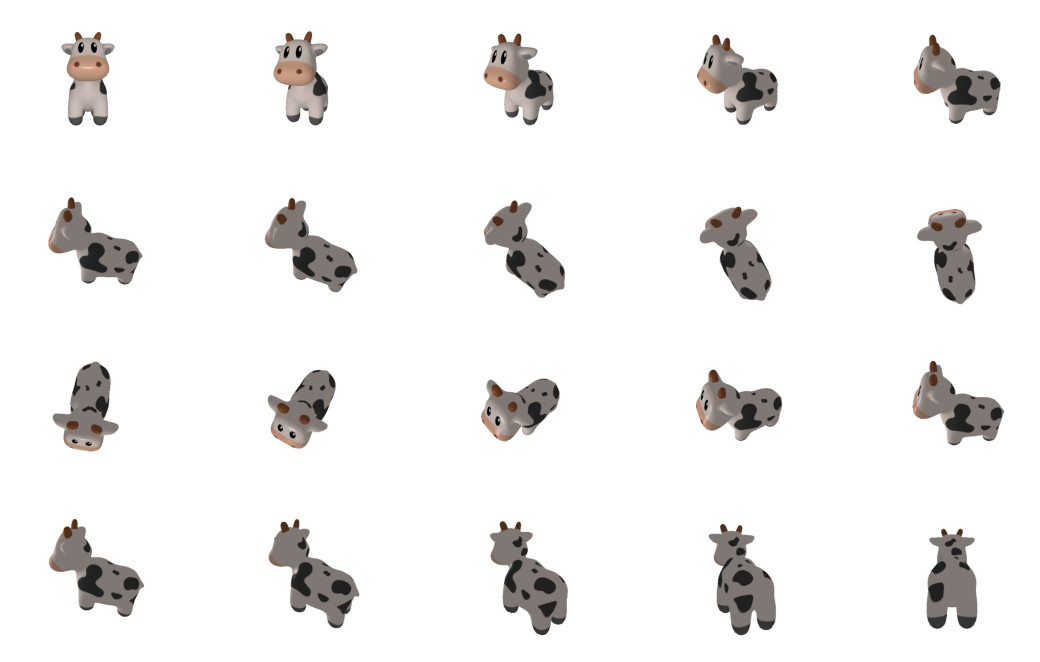

In [ ]:
image_grid(images.cpu().numpy(), rows=4, cols=5, rgb=True)